In [2]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [3]:
import pandas as pd 

In [4]:
drug_presc=pd.read_csv('Medicare_Provider_Utilization_and_Payment_Data__2014_Part_D_Prescriber.csv')

C:\Users\xiaoyang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
drug_presc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24121659 entries, 0 to 24121658
Data columns (total 21 columns):
npi                              int64
nppes_provider_last_org_name     object
nppes_provider_first_name        object
nppes_provider_city              object
nppes_provider_state             object
specialty_description            object
description_flag                 object
drug_name                        object
generic_name                     object
bene_count                       object
total_claim_count                object
total_30_day_fill_count          object
total_day_supply                 object
total_drug_cost                  object
bene_count_ge65                  object
bene_count_ge65_suppress_flag    object
total_claim_count_ge65           object
ge65_suppress_flag               object
total_30_day_fill_count_ge65     object
total_day_supply_ge65            object
total_drug_cost_ge65             object
dtypes: int64(1), object(20)
memory usage: 3.8

In [6]:
drug_presc['AMOXICILLIN']=drug_presc['generic_name'].apply(lambda x: x.find('AMOXI'))

In [7]:
drug_presc=drug_presc[drug_presc['AMOXICILLIN']!=-1]

In [8]:
drug_presc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267798 entries, 98 to 24121641
Data columns (total 22 columns):
npi                              267798 non-null int64
nppes_provider_last_org_name     267791 non-null object
nppes_provider_first_name        267796 non-null object
nppes_provider_city              267798 non-null object
nppes_provider_state             267798 non-null object
specialty_description            267798 non-null object
description_flag                 267798 non-null object
drug_name                        267798 non-null object
generic_name                     267798 non-null object
bene_count                       219839 non-null object
total_claim_count                267798 non-null object
total_30_day_fill_count          267798 non-null object
total_day_supply                 267798 non-null object
total_drug_cost                  267798 non-null object
bene_count_ge65                  48025 non-null object
bene_count_ge65_suppress_flag    219773 non-null

In [9]:
drug_presc.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,AMOXICILLIN
98,1962511980,HANDANOS,CHRISTINE,BIDDEFORD,ME,Internal Medicine,S,AMOX TR-POTASSIUM CLAVULANATE,AMOXICILLIN/POTASSIUM CLAV,17,...,161,338.3,NaN,#,NaN,#,NaN,NaN,NaN,0
113,1427072792,BARNES,MARK,WHEATON,IL,Dentist,T,AMOXICILLIN,AMOXICILLIN,NaN,...,47,46.67,NaN,*,14,NaN,14,47,46.67,0
296,1821020884,BOEHM,CAROL,ROCKVILLE,MD,Nurse Practitioner,S,AMOXICILLIN,AMOXICILLIN,15,...,141,102.37,NaN,*,NaN,*,NaN,NaN,NaN,0
318,1588764047,RASHID,AHSAN,IRVINE,CA,Internal Medicine,S,AMOXICILLIN,AMOXICILLIN,NaN,...,135,87.7,NaN,*,17,NaN,17,135,87.7,0
393,1740508696,DIAZ,YOSLAINE,WOODHAVEN,NY,Clinic/Center,T,AMOXICILLIN,AMOXICILLIN,28,...,326,117.53,NaN,#,NaN,#,NaN,NaN,NaN,0


In [10]:
drug_pres_b_t=drug_presc[['nppes_provider_state','bene_count','total_claim_count']][(drug_presc['bene_count'].isnull()==False) & (drug_presc['total_claim_count'].isnull()==False)]
drug_pres_b_t.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219839 entries, 98 to 24121514
Data columns (total 3 columns):
nppes_provider_state    219839 non-null object
bene_count              219839 non-null object
total_claim_count       219839 non-null object
dtypes: object(3)
memory usage: 6.7+ MB


In [11]:
drug_pres_b_t.head()

,nppes_provider_state,bene_count,total_claim_count
98,ME,17,18
296,MD,15,15
393,NY,28,32
415,CO,25,32
638,MA,21,25


In [12]:
drug_pres_b_t.head()

,nppes_provider_state,bene_count,total_claim_count
98,ME,17,18
296,MD,15,15
393,NY,28,32
415,CO,25,32
638,MA,21,25


In [13]:
import pandas as pd
drug_pres_b_t['total_claim_count']=drug_pres_b_t['total_claim_count'].apply(pd.to_numeric, errors='coerce')
drug_pres_b_t['bene_count']=drug_pres_b_t['bene_count'].apply(pd.to_numeric, errors='coerce')

In [14]:
drug_pres_b_t_gb_state=drug_pres_b_t.groupby('nppes_provider_state')[['total_claim_count','bene_count']].sum()[drug_pres_b_t.groupby('nppes_provider_state')['bene_count'].count()>50]

In [15]:
drug_pres_b_t_gb_state

,total_claim_count,bene_count
nppes_provider_state,,
AK,1786.0,1536.0
AL,154405.0,121601.0
AR,81092.0,62175.0
AZ,128355.0,106622.0
CA,615219.0,485689.0
CO,74154.0,58890.0
CT,74525.0,58211.0
DC,4824.0,3582.0
DE,24166.0,18761.0


In [16]:
drug_pres_b_t_gb_state.loc['MD']=drug_pres_b_t_gb_state.loc['MD']+drug_pres_b_t_gb_state.loc['DC']

In [17]:
drug_pres_b_t_gb_state

,total_claim_count,bene_count
nppes_provider_state,,
AK,1786.0,1536.0
AL,154405.0,121601.0
AR,81092.0,62175.0
AZ,128355.0,106622.0
CA,615219.0,485689.0
CO,74154.0,58890.0
CT,74525.0,58211.0
DC,4824.0,3582.0
DE,24166.0,18761.0


In [18]:
drug_pres_b_t_gb_state['claim_per_bene']=drug_pres_b_t_gb_state['total_claim_count']/drug_pres_b_t_gb_state['bene_count']

In [19]:
drug_pres_b_t_gb_state.drop(['DC','PR'], axis=0,inplace=True)

In [20]:
dp_gb_state_cpb=pd.DataFrame({'State':drug_pres_b_t_gb_state.index,'amoxicillin_claim_per_bene':drug_pres_b_t_gb_state['claim_per_bene'].values})

In [21]:
dp_gb_state_cpb.head()#.sort_values(by='claim_per_bene')

,State,amoxicillin_claim_per_bene
0,AK,1.162760
1,AL,1.269768
2,AR,1.304254
3,AZ,1.203832
4,CA,1.266693


In [22]:
dp_gb_state_cpb.to_csv('project_pic1_data',index=False)

In [23]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = dp_gb_state_cpb['State'],
            z = dp_gb_state_cpb['amoxicillin_claim_per_bene'],
            locationmode = 'USA-states',
            text =dp_gb_state_cpb['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"The number of amoxicillin claims per beneficiary"}
            ) 

In [24]:
layout = dict(title = 'Map of US states by amoxicillin claims per beneficiary(2015)',
              geo = dict(scope='usa'))

In [26]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [27]:
life_expectation=pd.read_csv('IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.csv')

In [28]:
life_expectation.head()

,State,County,"Male life expectancy, 1985 (years)","Female life expectancy, 1985 (years)","Male life expectancy, 1990 (years)","Female life expectancy, 1990 (years)","Male life expectancy, 1995 (years)","Female life expectancy, 1995 (years)","Male life expectancy, 2000 (years)","Female life expectancy, 2000 (years)","Male life expectancy, 2005 (years)","Female life expectancy, 2005 (years)","Male life expectancy, 2010 (years)","Female life expectancy, 2010 (years)","Difference in male life expectancy, 1985-2010 (years)","Difference in female life expectancy, 1985-2010 (years)"
0,United States,NaN,70.8,77.8,71.5,78.3,72.5,78.8,74.1,79.2,74.9,79.9,76.1,80.8,5.2,3.0
1,Alabama,NaN,69.1,76.9,69.4,77.1,69.9,77.2,71.0,77.2,71.5,77.3,72.4,77.8,3.3,0.9
2,Alabama,Autauga,68.1,77.0,68.5,77.0,69.3,77.3,71.7,77.6,72.5,77.4,73.3,78.8,5.2,1.8
3,Alabama,Baldwin,71.1,78.8,71.9,79.2,72.4,79.3,73.9,79.2,73.8,79.7,75.0,80.3,3.8,1.5
4,Alabama,Barbour,66.8,76.0,66.7,76.7,68.4,76.9,70.0,76.2,70.5,77.0,72.2,77.2,5.3,1.1


In [29]:
life_expect=life_expectation[['State','Male life expectancy, 2010 (years)','Female life expectancy, 2010 (years)']]

In [30]:
life_expect.drop([0],axis=0,inplace=True)

C:\Users\xiaoyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
life_expect.head()

,State,"Male life expectancy, 2010 (years)","Female life expectancy, 2010 (years)"
1,Alabama,72.4,77.8
2,Alabama,73.3,78.8
3,Alabama,75.0,80.3
4,Alabama,72.2,77.2
5,Alabama,71.5,76.8


In [32]:
life_exp_gb_state=life_expect.groupby('State').mean()

In [33]:
life_exp_gb_state['average_life_expectation']=(life_exp_gb_state['Male life expectancy, 2010 (years)']+life_exp_gb_state['Female life expectancy, 2010 (years)'].values)/2

In [34]:
life_exp_gb_state

,"Male life expectancy, 2010 (years)","Female life expectancy, 2010 (years)",average_life_expectation
State,,,
Alabama,71.426471,77.432353,74.429412
Alaska,75.800000,80.100000,77.950000
Arizona,75.081250,80.700000,77.890625
Arkansas,72.240789,77.993421,75.117105
California,77.186441,81.242373,79.214407
Colorado,76.978462,81.180000,79.079231
Connecticut,78.155556,82.188889,80.172222
Delaware,75.250000,80.275000,77.762500
District of Columbia,73.700000,79.100000,76.400000


In [35]:
avg_life_exp=pd.DataFrame({'State':life_exp_gb_state.index, 'Life_Expectation':life_exp_gb_state['average_life_expectation'].values})

In [36]:
avg_life_exp

,Life_Expectation,State
0,74.429412,Alabama
1,77.950000,Alaska
2,77.890625,Arizona
3,75.117105,Arkansas
4,79.214407,California
5,79.079231,Colorado
6,80.172222,Connecticut
7,77.762500,Delaware
8,76.400000,District of Columbia
9,77.298529,Florida


In [37]:
avg_life_exp.drop([8],axis=0, inplace=True)

In [38]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [39]:
avg_life_exp['State']=avg_life_exp['State'].apply(lambda x: us_state_abbrev[x])

In [40]:
avg_life_exp.head()

,Life_Expectation,State
0,74.429412,AL
1,77.950000,AK
2,77.890625,AZ
3,75.117105,AR
4,79.214407,CA


In [41]:
avg_life_exp.to_csv('project_pic1_data_2',index=False)

In [42]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = avg_life_exp['State'],
            z = avg_life_exp['Life_Expectation'],
            locationmode = 'USA-states',
            text =avg_life_exp['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"life expectancy"}
            ) 

In [43]:
layout = dict(title = 'Map of US states by life expectancy at birth (years)',
              geo = dict(scope='usa'))

In [44]:
choromap1 = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [45]:
St_cpb_le=pd.merge(dp_gb_state_cpb,avg_life_exp,on='State')

In [46]:
St_cpb_le

,State,amoxicillin_claim_per_bene,Life_Expectation
0,AK,1.162760,77.950000
1,AL,1.269768,74.429412
2,AR,1.304254,75.117105
3,AZ,1.203832,77.890625
4,CA,1.266693,79.214407
5,CO,1.259195,79.079231
6,CT,1.280256,80.172222
7,DE,1.288098,77.762500
8,FL,1.233100,77.298529
9,GA,1.275175,75.430313


In [47]:
St_cpb_le.to_csv('project_pic2_data',index=False)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
sns.lmplot(x='Life_Expectation', y='amoxicillin_claim_per_bene', data=St_cpb_le)

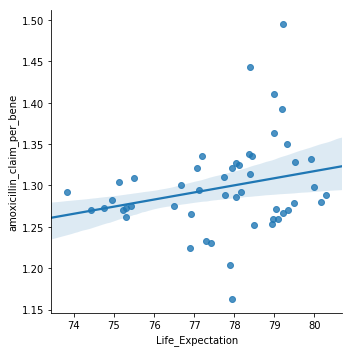

In [50]:
plt.show()